## Phase 2.14

# Hypothesis Testing
## Objectives
- Review Hypothesis Testing
- Review P-Values
- Effect Sizes
- T-Tests (1-Sample / 2-Sample)
- Type I & Type II Errors

# Experimental Design

1. Set up Hypothesis *(Hypotheses)*
2. Pick the statistical test based on your experiment.
3. Pick your alpha *(level of significance).*
4. Calculate your test statistic.
5. Find your p-value.
6. Interpret.

<img src='images/new_the-scientific-method.png'>

## Blind / Double Blind

<img src='images/new_double_blind.png'>

---

> ***Review: P-Value***
> 
> *A p-value is the probability of observing a test statistic **at least** as large as the one observed by random chance.*

---

# Effect Size
- Effect Size measures the difference between two groups.

- *Standardized Effect Size: **Cohen's d**.*
    - Measures the difference between groups in terms of the number of standard deviations.
    - <a href='https://rpsychologist.com/cohend/'>*Cohen's d - Interactive*</a>
        - *Small:* ***0.2***
        - *Medium:* ***0.5***
        - *Large:* ***0.8***

### Functions from Canvas

In [1]:
def Cohen_d(group1, group2):
    """
    Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns a floating point number 
    """

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()

    # Calculate the pooled threshold.
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic.
    d = diff / np.sqrt(pooled_var)
    
    return d

In [2]:
def evaluate_PDF(rv, x=4):
    '''
    Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

In [3]:
def overlap_superiority(group1, group2, n=1000):
    """
    Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    group1_sample = group1.rvs(n)
    group2_sample = group2.rvs(n)
    
    # Identify the threshold between samples
    thresh = (group1.mean() + group2.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1_sample < thresh)
    below = sum(group2_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

    return overlap, superiority

In [4]:
def plot_pdfs(cohen_d=2):
    """
    Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = stats.norm(0, 1)
    group2 = stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)

# 1-Sample T-Test
- *Very similar to the 1-Sample Z-Test!*

**We need:**
1. Population mean.
2. Sample data.

---

*Sample Question*
> *Acme Ltd. wants to improve sales performance. Past sales data indicate that the average sale was \$100 per transaction. After training the sales force, recent sales data (from a random sample of 25 salespeople) is given.*

In [5]:
import numpy as np
import scipy.stats as stats

In [6]:
recent_sales_data = np.array([
    122.09, 100.64, 125.77, 120.32, 118.25,
    96.47, 111.4, 80.66, 110.77, 111.14,
    102.9, 114.54, 88.09, 98.59, 87.07,
    110.43, 101.9, 123.89, 97.03, 116.23,
    108.3, 112.82, 119.57, 131.38, 128.39
])
recent_sales_data

array([122.09, 100.64, 125.77, 120.32, 118.25,  96.47, 111.4 ,  80.66,
       110.77, 111.14, 102.9 , 114.54,  88.09,  98.59,  87.07, 110.43,
       101.9 , 123.89,  97.03, 116.23, 108.3 , 112.82, 119.57, 131.38,
       128.39])

## Hypothesis

- $\Large H_0: \mu = 100$
- $\Large H_A: \mu > 100$


- $\Large \alpha = 0.05$

---

*What do we need?*
1. Population mean *(previous sales number)*
2. Number of samples ($n$)
3. Mean of sample ($\bar{x}$)
4. Sample standard deviation ($s$) *(Note: $\sigma$ (sigma) is reserved for **population** standard deviation.)*
5. Degrees of Freedom (**dof** or **df**)

In [7]:
population_mean = 100
n = len(recent_sales_data)
x_bar = round(recent_sales_data.mean(), 3)
s = round(recent_sales_data.std(), 3)
dof = n - 1

print(f'''
Population Mean:--{population_mean}
n: ---------------{n}
x_bar: -----------{x_bar}
s: ---------------{s}
DoF: -------------{dof}''')


Population Mean:--100
n: ---------------25
x_bar: -----------109.546
s: ---------------13.069
DoF: -------------24


## Calculation

$\LARGE \text{t-statistic} = \frac{(\bar{x} - \mu)}{(\frac{s}{\sqrt{dof}})}$

In [8]:
def calculate_t_statistic(mu, x_bar, s, dof):
    return (x_bar - mu) / (s / np.sqrt(dof))

t_stat = calculate_t_statistic(population_mean, x_bar, s, dof)
t_stat

3.578365457893983

### T-Table
- *We use the **degrees of freedom** (y-axis) and **alpha** (x-axis) to find the critical value.*

<img src='images/t-table.png'>

> *https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf*

In [9]:
from scipy.stats import norm
import matplotlib.pyplot as plt

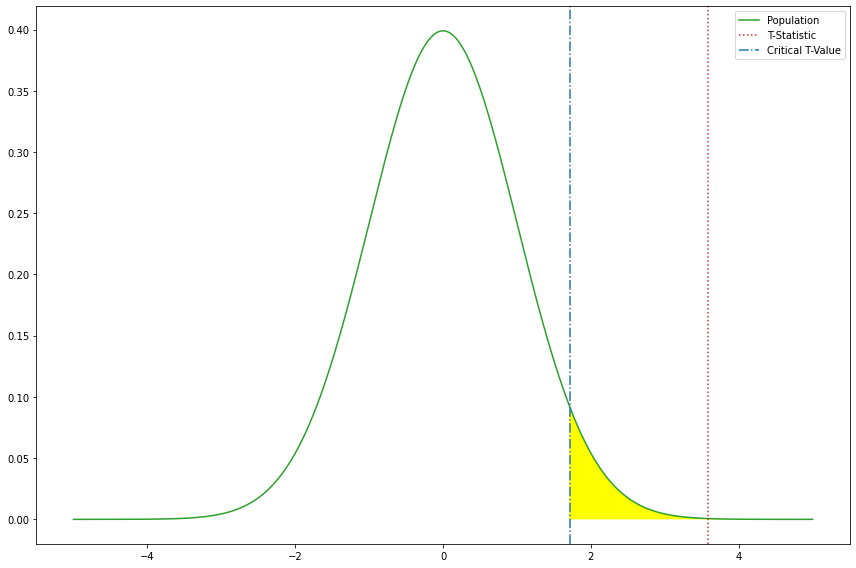

In [10]:
# Plot the population, t-statistic, and critical value.
CRIT_VAL = 1.711 # Referring to table above: dof=24

fig, ax = plt.subplots(figsize=(12,8))
x_vals = np.arange(-5, 5, 0.001)
y_vals = norm.pdf(x_vals)
ax.plot(x_vals, y_vals, color='tab:green',  label='Population')
ax.axvline(t_stat, ls=':', color='tab:red', label='T-Statistic') # T-statistic
ax.axvline(CRIT_VAL, ls='-.', color='tab:blue', label='Critical T-Value') # Critical value
ax.fill_between(
    x_vals, y_vals, where=(x_vals >= CRIT_VAL), facecolor='yellow') # Coloring tail
ax.legend()
fig.tight_layout()

***Since the t-statistic is greater than the critical t-value, we can reject the null hypothesis ($H_0$) that the training had no effect on sales performance.***

## Using Python!

In [11]:
# One-liner in Python!
stats.ttest_1samp(recent_sales_data, population_mean)

Ttest_1sampResult(statistic=3.578139767278185, pvalue=0.0015178945415114085)

# 2-Sample T-Test
- Used to measure if two population means are equal.
In the context of controlled experiments, you will often see talk about the "control" group and the "experimental" or "treatment" group. In a drug test example, the control group is the group given the placebo and the treatment group is given the actual drug. Researchers are interested in the average difference in blood pressure levels between the treatment and control groups.

> The 50 subjects in the control group have an average systolic blood pressure of 121.38 who have been given a placebo drug.
>
>The 50 subjects in the experimental / treatment group have an average systolic blood pressure of 111.56 after treatment with the drug being tested.

The apparent difference between experimental and control groups is -9.82 points. But with 50 subjects in each group, how confident can a researcher be that this measured difference is real? You can perform a two sample t-test to evaluate this.

## Hypothesis
- $H_0: \mu_1 - \mu_2 = 0$
- $H_A: \mu_1 - \mu_2 \neq 0$


- $\alpha = 0.05$
    - *two-tailed*

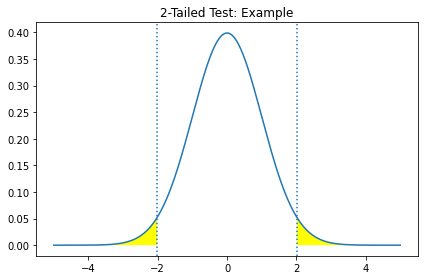

In [12]:
fig, ax = plt.subplots()

x_vals = np.arange(-5, 5, 0.001)
y_vals = norm.pdf(x_vals)
CRIT_VAL = 2.021
ax.plot(x_vals, y_vals)
ax.axvline(CRIT_VAL, ls=':')
ax.axvline(-CRIT_VAL, ls=':')
ax.fill_between(
    x_vals, y_vals, 
    where=((x_vals < -CRIT_VAL) | (x_vals > CRIT_VAL)), 
    facecolor='yellow')
ax.set(title='2-Tailed Test: Example')
fig.tight_layout()

*What do we need to know?*

- $\mu_1 = 121.38$
- $n_1 = 50$


- $\mu_2 = 111.56$
- $n_2 = 50$

## Calculation
$\LARGE t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}}$

$\large \text{pooled_variance} = s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$



*Where $s_1^{2}$ and $s_2^{2}$ are the variances for each sample:*

$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $

In [13]:
control = np.array([
    166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,                
    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,                
    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,                
    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155
])

experimental = np.array([ 
    83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
    101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
    97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
    116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76
])

In [14]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean)**2) / (len(sample) - 1)

In [15]:
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1 - 1) * var_1 + (n_2-1) * var_2) / ((n_1 + n_2) - 2)

In [16]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

t_stat = twosample_tstatistic(experimental, control)
t_stat

-1.8915462966190273

In [17]:
# One-sided p-value.
left_tail_crit = stats.t.cdf(t_stat, (50 + 50 - 2), 0, 1)
left_tail_crit

0.030752120336265197

In [21]:
# "Other side" of the tail.
right_tail_crit = 1 - stats.t.cdf(t_stat, (50 + 50 - 2), 0, 1)
right_tail_crit

0.9692478796637348

In [19]:
p_value = (
    stats.t.cdf(t_stat, (50 + 50 - 2), 0, 1) 
    + (1 - stats.t.cdf(-t_stat, (50 + 50 - 2), 0, 1))
)
p_value

0.06150424067253037

## Using Python!

In [22]:
# One-liner in Python!
stats.ttest_ind(experimental, control)

Ttest_indResult(statistic=-1.8915462966190273, pvalue=0.061504240672530394)

In [23]:
Cohen_d(control, experimental)

0.3821500609336042

0.1910750304668021
overlap 1.149
superiority 0.409


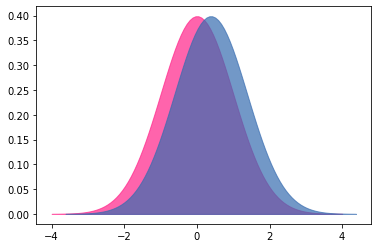

In [24]:
plot_pdfs(Cohen_d(control, experimental))

## Interpret

- We fail to reject the null hypothesis $H_0$.


- The two populations are not significantly different, so the drug cannot be said to have an impact on blood pressure.

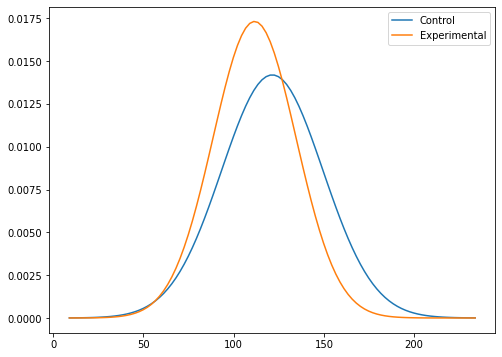

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

control_pop = stats.norm(loc=control.mean(), scale=control.std())
experimental_pop = stats.norm(loc=experimental.mean(), scale=experimental.std())
x = np.linspace(
    control_pop.mean() - control_pop.std() * 4, 
    control_pop.mean() + control_pop.std() * 4, 
    100
    )
control_y = control_pop.pdf(x)
experimental_y = experimental_pop.pdf(x)

ax.plot(x, control_y, label='Control')
ax.plot(x, experimental_y, label='Experimental')
ax.legend();

# Type I and Type II Errors

- In statistical testing, everything is based on a probability or statistical significance.


- There are situations **where we reject $H_0$ when we should not have** *(Type I error)*...
- ...or **fail to reject the null hypothesis when it is actually false** *(Type II error)*.

---

- **Type I Error:** False Positive
    - $\large \alpha$
- **Type II Error:** False Negative
    - $\large \beta$
    
<img src='images/errors.png'>

---


*We will continue talking about False Positive and False Negatives again in detail in Phase 3...*